In [49]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_population(num_generations, initial_female_ratio, initial_resource_area_ratio, habitat_capacity):
    habitat_occupation = []
    female_ratio = initial_female_ratio
    resource_area_ratio = initial_resource_area_ratio

    for generation in range(num_generations):
        # 根据当前性别比例和资源区占用比例更新下一代性别比例和资源区占用比例
        # 增加随机性的程度，使结果更加波动
        female_ratio += np.random.uniform(-0.1, 0.1)
        female_ratio = np.clip(female_ratio, 0, 1)  # 保持在合理范围内

        resource_area_ratio += np.random.uniform(-0.2, 0.2)
        resource_area_ratio = np.clip(resource_area_ratio, 0, 1)  # 保持在合理范围内

        habitat_occupation.append(resource_area_ratio)

    return habitat_occupation




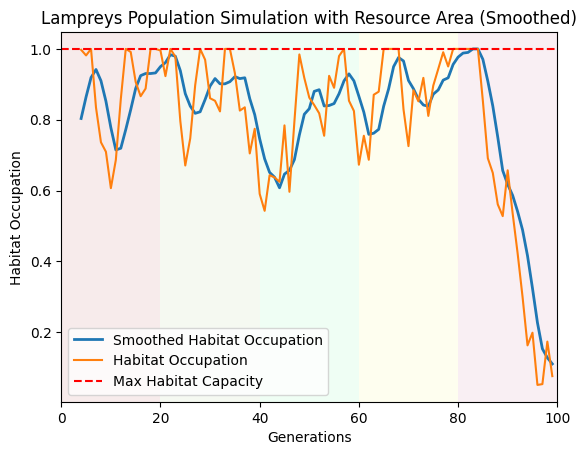

In [50]:
import random
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    """Calculate the moving average of a given data with a specified window size."""
    return [sum(data[i:i+window_size]) / window_size for i in range(len(data) - window_size + 1)]

# 运行模拟
num_generations = 100
initial_female_ratio = 0.5
initial_resource_area_ratio = 0.5
habitat_capacity = 1.0

habitat_occupation = simulate_population(num_generations, initial_female_ratio, initial_resource_area_ratio, habitat_capacity)

# 使用移动平均计算平滑后的数据
window_size = 5
smoothed_habitat_occupation = moving_average(habitat_occupation, window_size)

# 调整窗口大小以确保长度一致
generations = range(window_size - 1, num_generations)

# 绘制模拟结果
plt.plot(generations, smoothed_habitat_occupation, linewidth=2, label='Smoothed Habitat Occupation')
plt.plot(generations, habitat_occupation[window_size-1:], label='Habitat Occupation')

plt.axhline(habitat_capacity, color='red', linestyle='--', label='Max Habitat Capacity')
plt.title('Lampreys Population Simulation with Resource Area (Smoothed)')
plt.xlabel('Generations')
plt.ylabel('Habitat Occupation')
# 每20个generation添加一个背景底色
for i in range(0, len(generations), 20):
    plt.axvspan(i, i+20, facecolor=(random.random(), random.random(), random.random()), alpha=0.1)  # 设置随机背景底色
plt.legend()
# 设置 x 轴标签顶格
plt.margins(x=0)
plt.show()
